## Visualizing Loans Awarded by Kiva
***

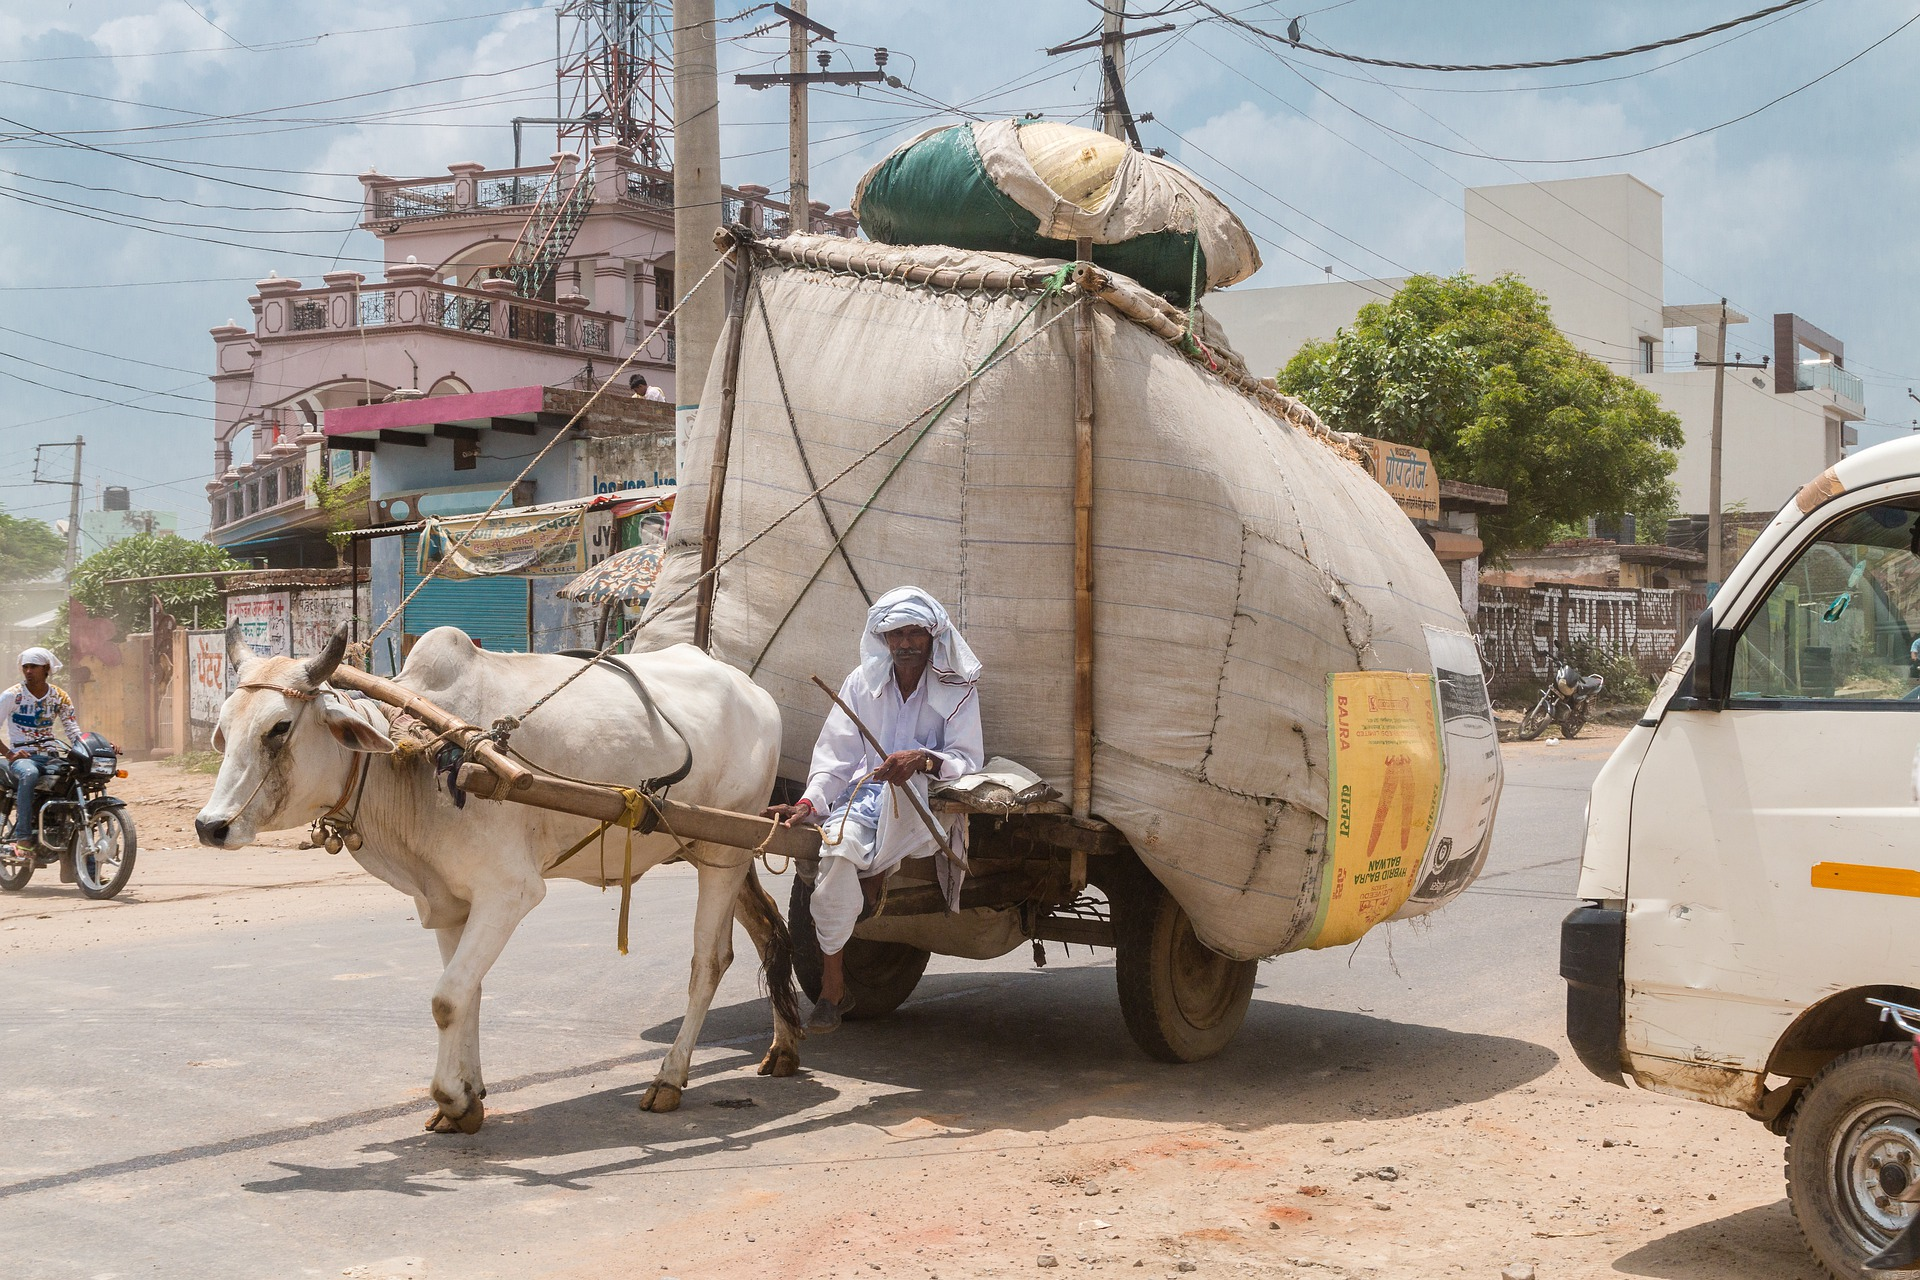

In this project you'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, you'll explore the average loan amount by country using aggregated bar charts. You'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

**A Note On `plt.show()`:** You may be used to displaying your plots using the code `plt.show()`. This IPython Jupyter notebook removes the necessity of calling `plt.show()` after each plot. You should be able to render your Seaborn plots simply by running the cell with the code for your plot. If you have issues rendering your plot you can try adding `plt.show()` to a cell.

## Import Libraries 

Import the modules that you'll be using in this project:

- `matplotlib`
- `pandas`
- `seaborn`

In [8]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Examine the Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project download folder.

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 

Download the data from the `kiva_data.csv` file to a dataframe and inspect it.

In [6]:
df = pd.read_csv('kiva_data.csv')
print(df.head())

   loan_amount               activity   country  gender
0          625  Food Production/Sales  Pakistan  female
1          250  Food Production/Sales  Pakistan  female
2          400  Food Production/Sales  Pakistan  female
3          400  Food Production/Sales  Pakistan  female
4          500  Food Production/Sales  Pakistan  female


## Create Bar Plots

Create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country. Make sure to set the `loan_amount` ticks on the y-axis to begin with a `$` (units of USD).

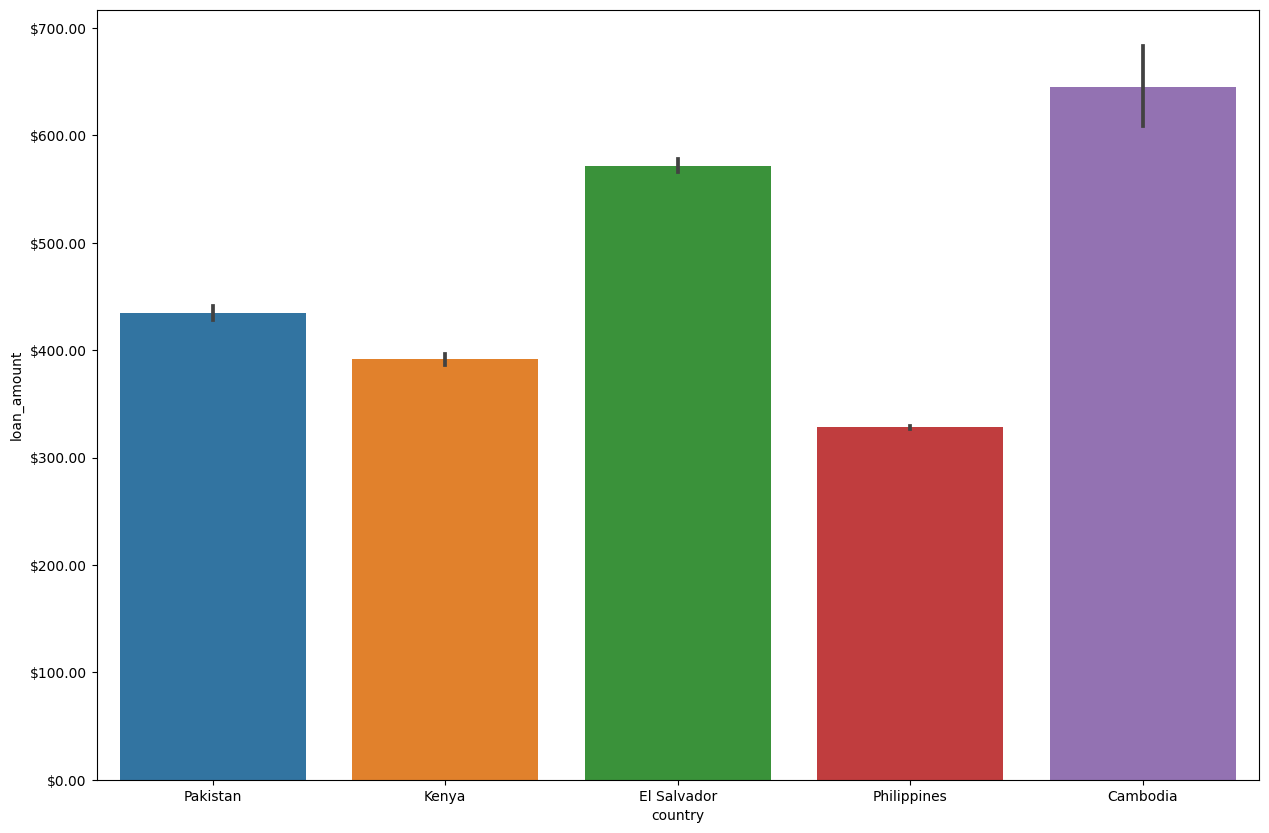

In [18]:
# Create the figure
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df, x="country", y="loan_amount")

# Use automatic StrMethodFormatter to prepend dollar signs on y axis labels
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.show()

## Change Hues & Analyze Data

You can visualize even more data on one bar plot by visualizing the `loan_amount` by country, and "nesting" by `gender`. 

Make sure to understand the data. 

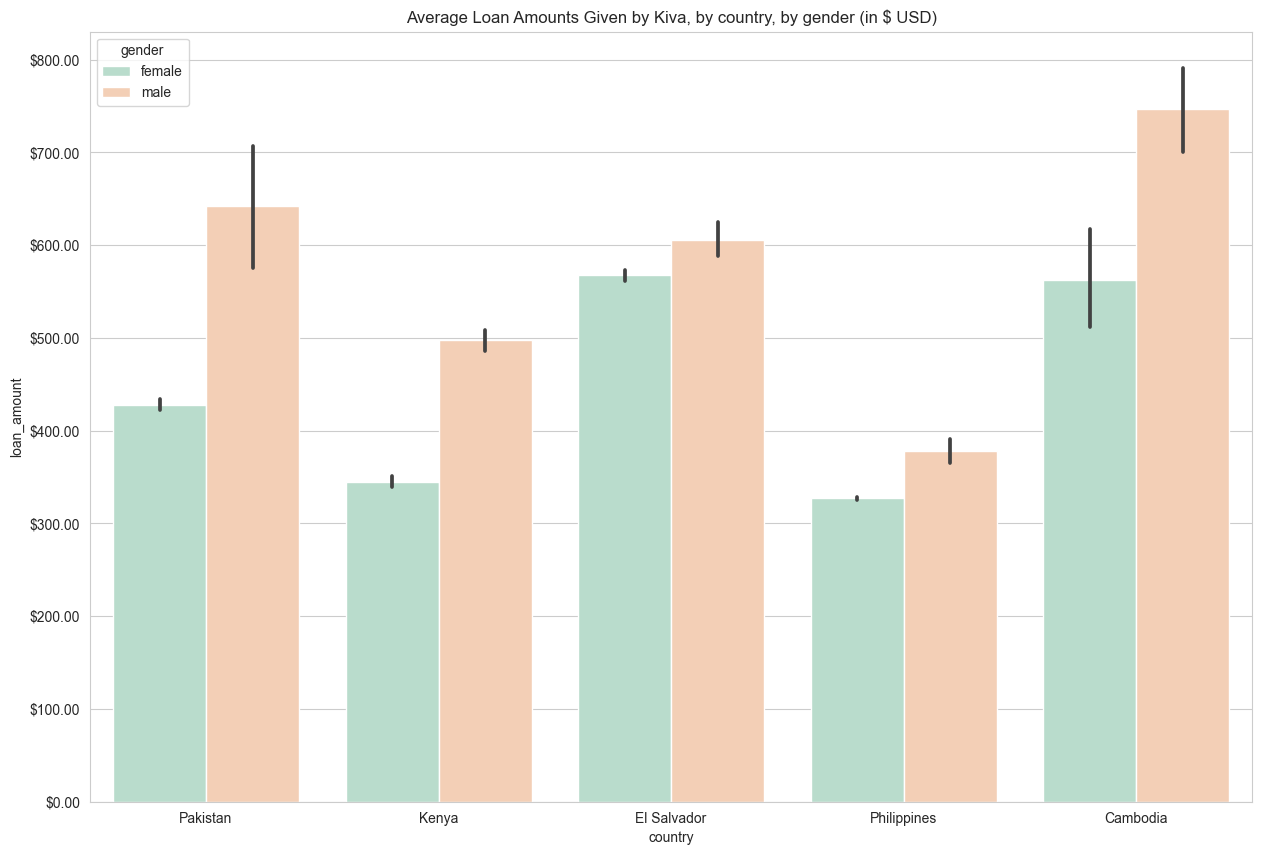

In [45]:
# Create the figure, add the hue parameter to the sns.barplot() to get nested category plotted
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df, x="country", y="loan_amount", hue = "gender")

# Use automatic StrMethodFormatter to prepend dollar signs on y axis labels
ax.yaxis.set_major_formatter('${x:1.2f}')

# Set color palette
sns.set_palette("Pastel2")

# Set style
sns.set_style("whitegrid")

# Add a title
plt.title("Average Loan Amounts Given by Kiva, by country, by gender (in $ USD)")

plt.show()

Try to find the answers to the following inqueries from the team:

* On average, do female or male recipients receive larger loans from Kiva?
* Which country has the *least* disparity in loan amounts awarded by gender?
* Based on the data, what kind of recommendations can you make to Kiva about the loans they give?
* What actions could be taken to implement the recommendations you've made?

Looking at the bar plot, we learn that on average male recipients received larger loans from Kiva and this can be supported by the table below. From the countries sampled, El Salvador has the least disparity in loan amounts awarded by gender. Based on the data, Kiva should try to work to decrease the gender loan gap. To do so, Kiva could potentially implement a system to award loans to an equal number of male and female driven projects.

In [81]:
print(df.groupby(['country','gender']).describe())

                   loan_amount                                                \
                         count        mean         std    min     25%    50%   
country     gender                                                             
Cambodia    female        93.0  562.903226  251.830605  100.0  375.00  500.0   
            male          75.0  747.000000  206.644688  225.0  600.00  750.0   
El Salvador female      5480.0  567.454380  241.525649  100.0  400.00  500.0   
            male         692.0  605.599711  250.824043  100.0  400.00  550.0   
Kenya       female      4943.0  345.028323  208.558142   50.0  200.00  300.0   
            male        2157.0  497.681966  258.161906   50.0  250.00  475.0   
Pakistan    female      1732.0  427.987875  123.657231  100.0  350.00  400.0   
            male          54.0  642.129630  248.097671  200.0  456.25  700.0   
Philippines female     49384.0  327.199599  161.456779   50.0  225.00  300.0   
            male         889.0  377.6996

## Visualize Box Plots

So far you have visualized the average size of loans by country using bar charts. Take a look at another visualization by creating a box plot to compare the distribution of loans by country. 

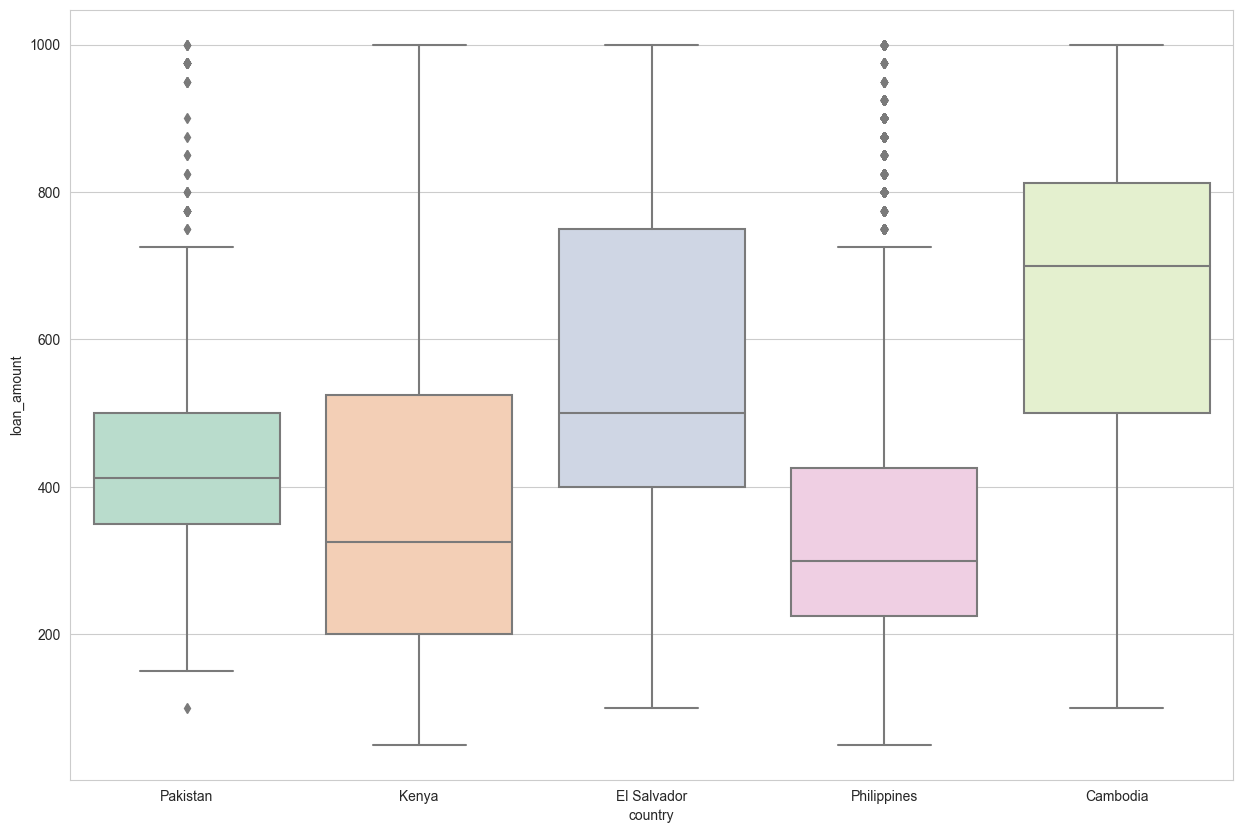

In [49]:
# Create a boxplot of loan amount distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="country", y="loan_amount")

plt.show()

## Visualize Activity with a Box Plot

Instead of visualizing the loan amount by *country*, plot the loan amount by *activity*.

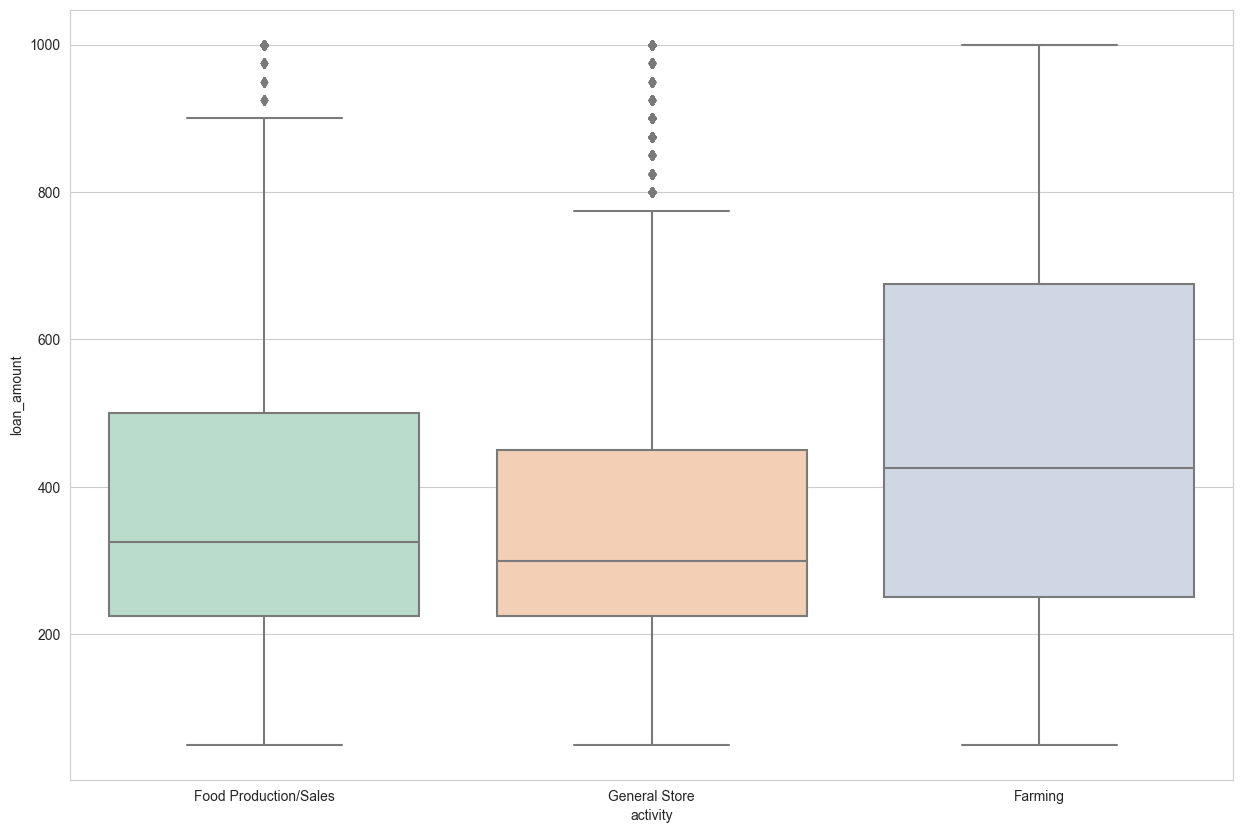

In [50]:
# Create a boxplot of loan amount distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="activity", y="loan_amount")

plt.show()

This visualization shows us the loan amounts by activity. It reveals that on average farming receives the largest loan amount and has the widest distribution.

In [83]:
print(df.groupby(['activity']).describe())

                      loan_amount                                              \
                            count        mean         std   min    25%    50%   
activity                                                                        
Farming                    2744.0  458.691691  245.407288  50.0  250.0  425.0   
Food Production/Sales     13239.0  373.119193  211.454036  50.0  225.0  325.0   
General Store             49516.0  353.175741  185.138303  50.0  225.0  300.0   

                                      
                         75%     max  
activity                              
Farming                675.0  1000.0  
Food Production/Sales  500.0  1000.0  
General Store          450.0  1000.0  


## Visualize Activity & Country with a Violin Plots

Similarly, create a violin plot to visualize the loan amount by activity as well as country. 

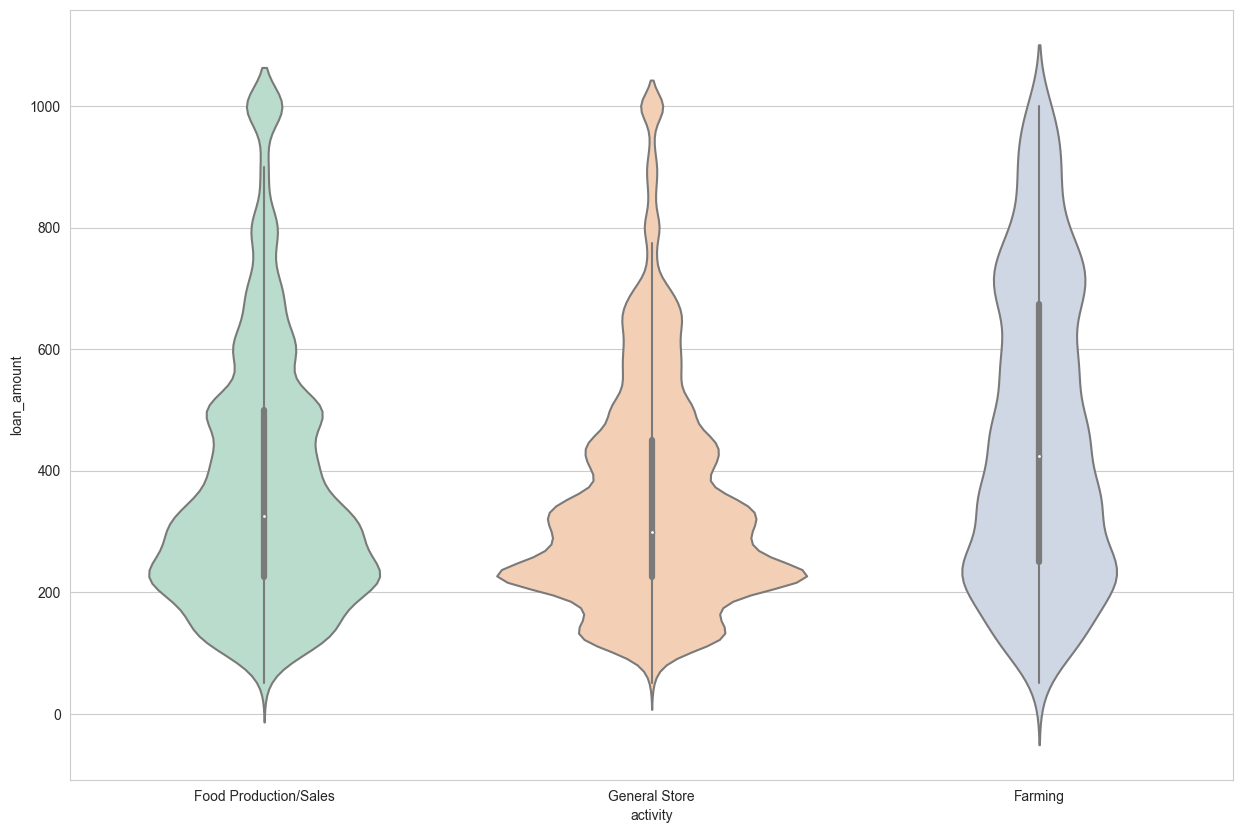

In [51]:
# Create a violin plot of loan amount by activity
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x="activity", y = "loan_amount")
plt.show()

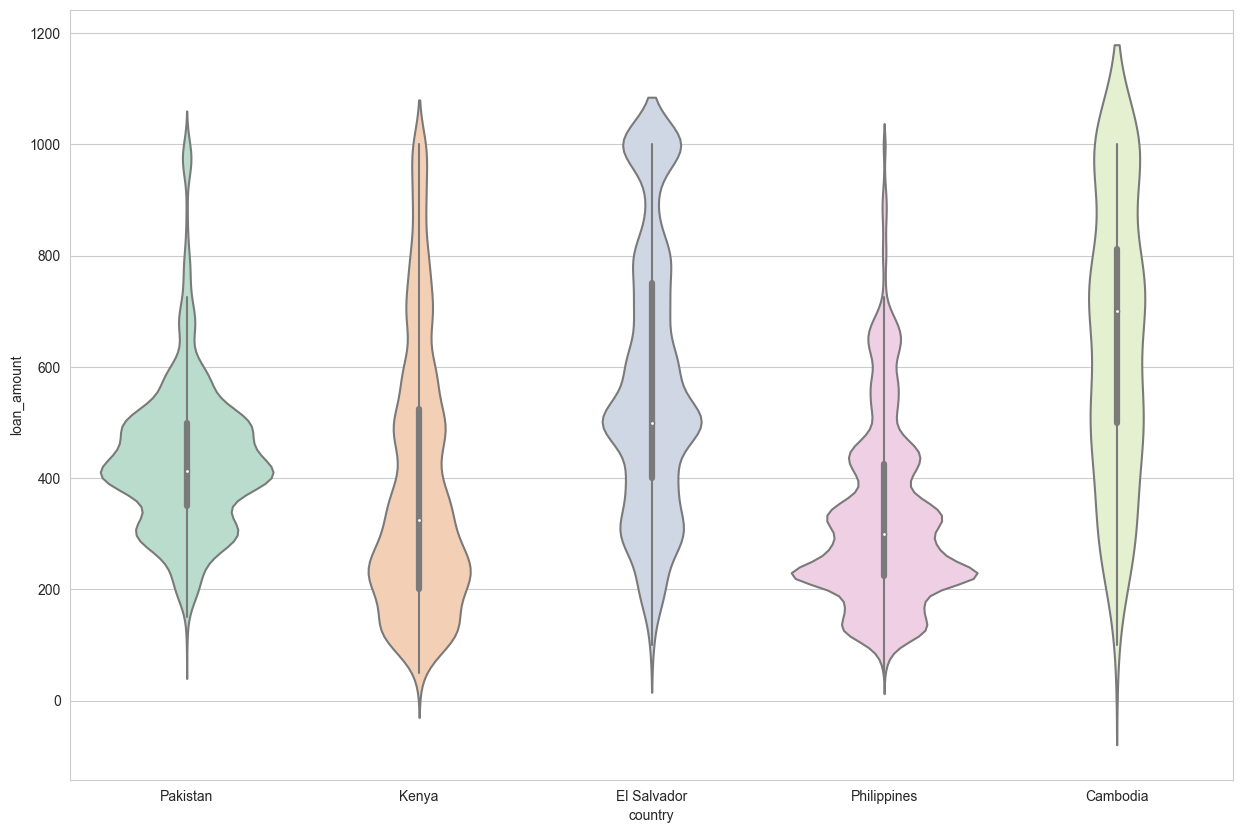

In [52]:
# Create a violin plot of loan amount by country
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x="country", y = "loan_amount")
plt.show()

## Explore Split Violin Plots

Use the `hue` and `split` parameters with `sns.violinplot()` to visualize the distribution of loan amount by country, split by gender. Reflect on what this visualization reveals about the distribution of loan amounts within countries by gender?

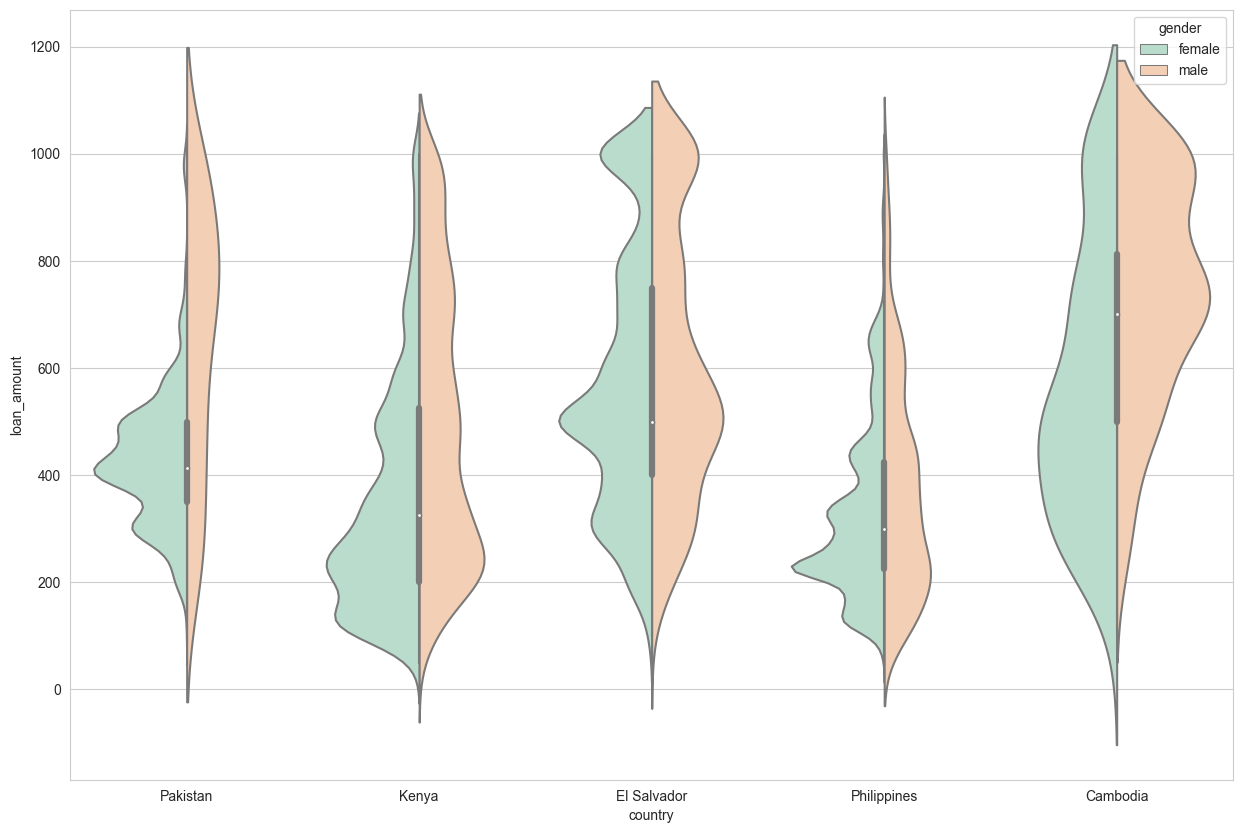

In [54]:
# Create a violin plot of loan amount by country
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x="country", y = "loan_amount", hue = "gender", split = True)
plt.show()

The visualization reveals that El Salvador has a fairly even distribution of loans between genders and have similar median loan amounts. Furthermore, on average women in Pakistan received much less loan amount than their male counterparts. 

## Challenge

Congratulations!! You used Seaborn to visualize insights using a dataset from Kaggle. You explored the average loan amount by country using aggregated bar charts, box plots, and violin plots. You also nested the data by gender, allowing you to draw additional insights from your charts. 

After taking a look at your visualizations, one of the board members sends a note that they read violin plots better when they are horizontal with quartiles as horizontal lines instead of a mini-box. Create a new pair of violin plots displaying loan amount by activity and country with this new format. This task can be considered as a challenge assignment which does not need to be completed to move on to the next section:

Recreate the loan amount by activity and country violin plots, but in a horizontal orientation with lines indicating each observation in the dataset.

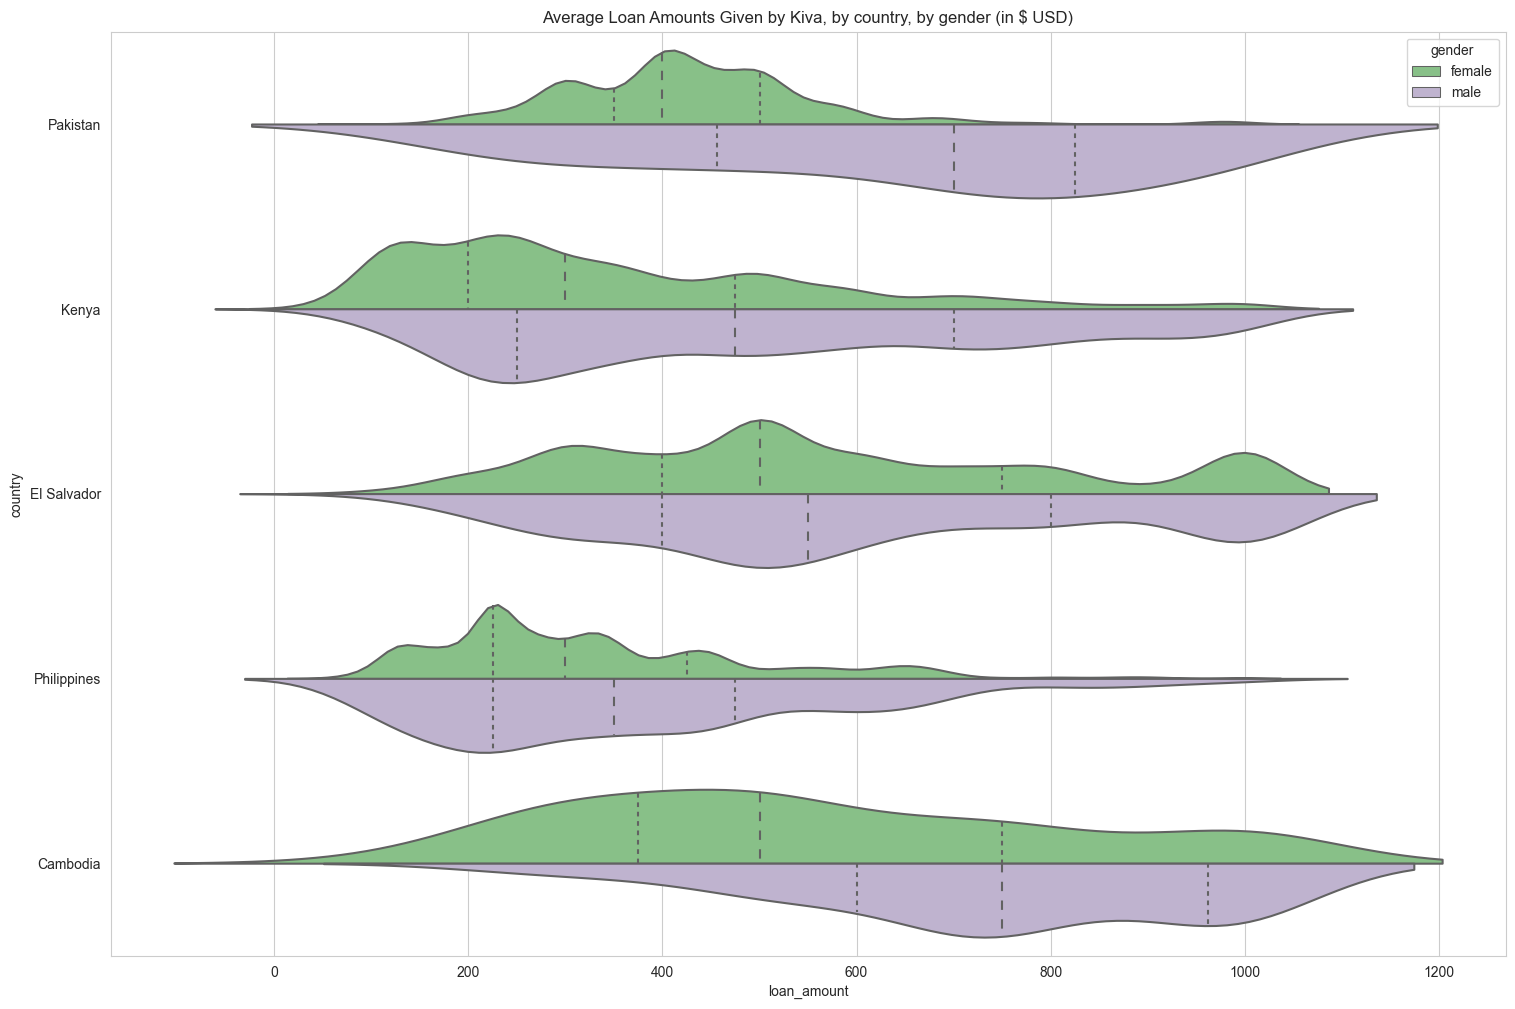

In [58]:
# Create a horizontasl violin plot with observations
sns.set_palette("Accent")
plt.figure(figsize=(18, 12))
sns.violinplot(x="loan_amount", y="country", hue="gender", data=df, split=True,
                    scale="width", inner="quartile")
# Add a title
plt.title("Average Loan Amounts Given by Kiva, by country, by gender (in $ USD)")

plt.show()

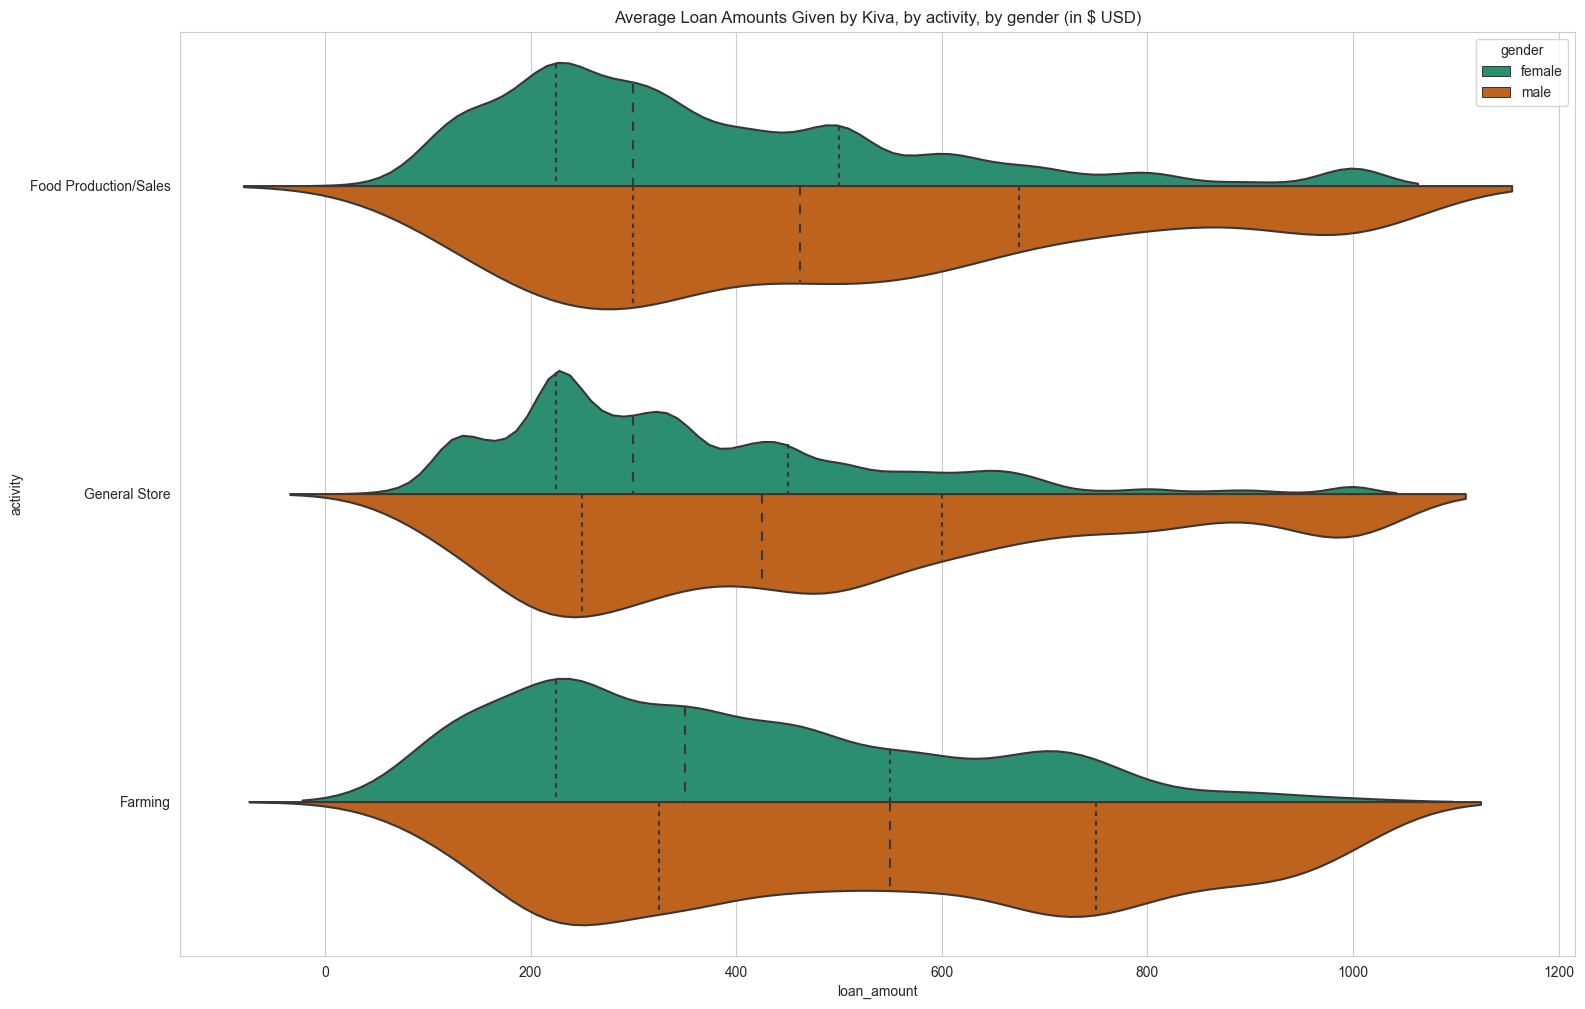

In [60]:
# Create a horizontasl violin plot with observations
sns.set_palette("Dark2")
plt.figure(figsize=(18, 12))
sns.violinplot(x="loan_amount", y="activity", hue="gender", data=df, split=True,
                    scale="width", inner="quartile")
# Add a title
plt.title("Average Loan Amounts Given by Kiva, by activity, by gender (in $ USD)")

plt.show()